Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_25 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_26 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                

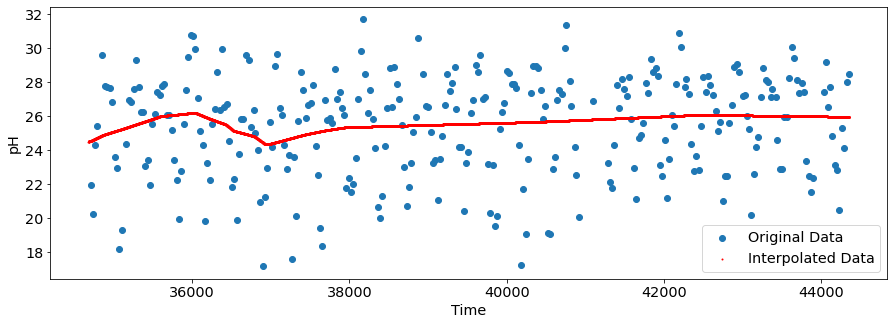

313/313 [==============================] - 0s 369us/step - loss: 9.3330e-16
['loss']


In [4]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation/Water temperature/saved_model/my_modelAR03_WT')

# Check its architecture
model.summary()

df = pd.read_csv("C:/Users/yanzh/Desktop/WT_data/AR03.csv")
time = df['time'].values
WT = df['WT'].values
df

#Transform the normalized scale to real scale
WT_min = 17.16
WT_max = 31.68666667
time_min = 34710.00                
time_max = 44356.37                     

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(WT_max - WT_min) + WT_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, WT*(WT_max - WT_min) + WT_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('pH')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [5]:
interpolation = model.predict([0.012025251
,0.043643369
,0.4348787
,0.646460923
,0.649467236
,0.652680881
,0.65579086
,0.659004504
,0.665328128
,0.668541773
,0.671651751
,0.674865396
,0.677975375
,0.955592815
,0.958702793
,0.961916438
])
interpolation

array([[0.5253338 ],
       [0.55829275],
       [0.571915  ],
       [0.5927989 ],
       [0.59320134],
       [0.59363145],
       [0.5940477 ],
       [0.59447795],
       [0.5953244 ],
       [0.59575456],
       [0.5961708 ],
       [0.59660095],
       [0.5970172 ],
       [0.6074708 ],
       [0.6073449 ],
       [0.60721487]], dtype=float32)